# Assessment Review

The topics covered will be:

1. SQL
2. Bayesian Statistics
3. Normal Distributions
4. Statistical Tests

In [ ]:
# from src.call import call_on_students



## Part 1: SQL

In [3]:
# Need to import pandas and sqlite3
import pandas as pd
import sqlite3

In [4]:
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')
schema_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", conn)

schema_df

,type,name,tbl_name,rootpage,sql
0,table,Album,Album,2,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...
1,table,Artist,Artist,3,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...
2,table,Customer,Customer,4,CREATE TABLE [Customer]\n(\n [CustomerId] I...
3,table,Employee,Employee,7,CREATE TABLE [Employee]\n(\n [EmployeeId] I...
4,table,Genre,Genre,9,CREATE TABLE [Genre]\n(\n [GenreId] INTEGER...
5,table,Invoice,Invoice,10,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...
6,table,InvoiceLine,InvoiceLine,12,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...
7,table,MediaType,MediaType,14,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...
8,table,Playlist,Playlist,15,CREATE TABLE [Playlist]\n(\n [PlaylistId] I...
9,table,PlaylistTrack,PlaylistTrack,16,CREATE TABLE [PlaylistTrack]\n(\n [Playlist...


In [5]:
pd.read_sql(
    """
    SELECT *
    FROM Customer
    LIMIT 3
    """, conn
)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


In [6]:
pd.read_sql(
    """
    SELECT *
    FROM Invoice
    LIMIT 3
    """, conn
)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94


### Task 1: Write a query to return the customer IDs for every customer in Germany.

In [7]:
# call_on_students(1)

pd.read_sql("""

SELECT CustomerID
FROM Customer
WHERE Country='Germany'

""", conn)

,CustomerId
0,2
1,36
2,37
3,38


### Task 2: Write a query to return the last names, email addresses and *billing* addresses of the customers who live in Canada.

In [8]:
# call_on_students(1)
pd.read_sql('''
   
SELECT
    DISTINCT(c.LastName),
    c.Email,
    i.BillingAddress
FROM
    Customer as c
    INNER JOIN Invoice as i on i.CustomerId = c.CustomerId
WHERE
    c.Country = 'Canada'

''', conn)

,LastName,Email,BillingAddress
0,Philips,mphilips12@shaw.ca,8210 111 ST NW
1,Silk,marthasilk@gmail.com,194A Chain Lake Drive
2,Sullivan,ellie.sullivan@shaw.ca,5112 48 Street
3,Peterson,jenniferp@rogers.ca,700 W Pender Street
4,Brown,robbrown@shaw.ca,796 Dundas Street West
5,Francis,edfrancis@yachoo.ca,230 Elgin Street
6,Mitchell,aaronmitchell@yahoo.ca,696 Osborne Street
7,Tremblay,ftremblay@gmail.com,1498 rue Bélanger


### Task 3: Write a query to return the billing totals by country, in descending order of the totals.

In [9]:
# call_on_students(1)

pd.read_sql('''
   
SELECT
    BillingCountry, SUM(Total)as billing_totals
FROM
    Invoice 
    
GROUP BY   BillingCountry

ORDER BY billing_totals DESC
''', conn)

,BillingCountry,billing_totals
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


### ***Task 4: Write a query to return the last names, email addresses, billing addresses, and most recent invoice dates for the customers whose most recent invoice is after Dec 31, 2011.

# my thinking process 

Note: this is not for grading purposes, just helps me to see it step by step 

output:  last names, email addresses, billing addresses, and most recent invoice dates 

from: customers 

condition: most recent invoice is after Dec 31, 2011.



In [11]:
pd.read_sql('''

SELECT c.LastName, 
       c.Email, 
       i.BillingAddress, 
       MAX(i.InvoiceDate) AS MostRecentInvoiceDate
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
HAVING MAX(i.InvoiceDate) > '2011-12-31'
ORDER BY MostRecentInvoiceDate DESC;

''', conn)

,LastName,Email,BillingAddress,MostRecentInvoiceDate
0,Pareek,manoj.pareek@rediff.com,"12,Community Centre",2013-12-22 00:00:00
1,Hämäläinen,terhi.hamalainen@apple.fi,Porthaninkatu 9,2013-12-14 00:00:00
2,Sampaio,masampaio@sapo.pt,"Rua dos Campeões Europeus de Viena, 4350",2013-12-09 00:00:00
3,Brown,robbrown@shaw.ca,796 Dundas Street West,2013-12-06 00:00:00
4,Stevens,vstevens@yahoo.com,319 N. Frances Street,2013-12-05 00:00:00
5,Chase,kachase@hotmail.com,801 W 4th Street,2013-12-04 00:00:00
6,Gordon,johngordon22@yahoo.com,69 Salem Street,2013-12-04 00:00:00
7,Miller,dmiller@comcast.com,541 Del Medio Avenue,2013-11-21 00:00:00
8,Holý,hholy@gmail.com,Rilská 3174/6,2013-11-13 00:00:00
9,Gutiérrez,diego.gutierrez@yahoo.ar,307 Macacha Güemes,2013-11-08 00:00:00


In [12]:
pd.read_sql(
    """
WITH t AS
(
SELECT 
    CustomerId, BillingAddress, MAX(InvoiceDate) as latestInvoice
FROM 
    Invoice
WHERE 
    InvoiceDate > "2011-12-31"
GROUP BY 
    CustomerId
)



SELECT 
    LastName, Email, latestInvoice
FROM 
    Customer, t
GROUP BY 
    Customer.CustomerId
ORDER BY
    Customer.LastName
    """, conn
)

,LastName,Email,latestInvoice
0,Almeida,roberto.almeida@riotur.gov.br,2013-08-07 00:00:00
1,Barnett,jubarnett@gmail.com,2013-08-07 00:00:00
2,Bernard,camille.bernard@yahoo.fr,2013-08-07 00:00:00
3,Brooks,michelleb@aol.com,2013-08-07 00:00:00
4,Brown,robbrown@shaw.ca,2013-08-07 00:00:00
5,Chase,kachase@hotmail.com,2013-08-07 00:00:00
6,Cunningham,ricunningham@hotmail.com,2013-08-07 00:00:00
7,Dubois,marc.dubois@hotmail.com,2013-08-07 00:00:00
8,Fernandes,jfernandes@yahoo.pt,2013-08-07 00:00:00
9,Francis,edfrancis@yachoo.ca,2013-08-07 00:00:00


## Part 2: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 5: Calculate the probability

# My thinking process 

P(D)=0.6 , P(N|D)0.75,  P(R)=0.4, p(N|R)=0.05           P(D|N) = P(N|D)P(D)/p(N)    P(n)= p(N|D)P(D)+P(N|R)P(R)

**1. Which probability are we trying to find?**

   - P(D|N) 
   

**2. Based on that, what other pieces do we need?**

   -  P(D|N) = P(N|D)P(D)/P(N) 
    

**3. Result?**

In [14]:
ans = ((.75) * (.6)) / ((.75 *.6) + (.05 * .4))
   
ans

0.9574468085106382

## Part 3: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 6: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

#  my thinking process 

this section is not for grading purposes, just helps me to analyze the question step by step 

- sleep dist~ N(m=6, std= 2)

In [23]:
# Code here
z_eight = (8-6)/2
z_eight

1.0

### Task 7: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [28]:
from scipy import stats

In [29]:
# Code here
#look for p(z>8)
over_eight = 1 - stats.norm(loc=6, scale=2).cdf(8)    #cdf represents the area under curve p(Z<=8)

over_eight

0.15865525393145707

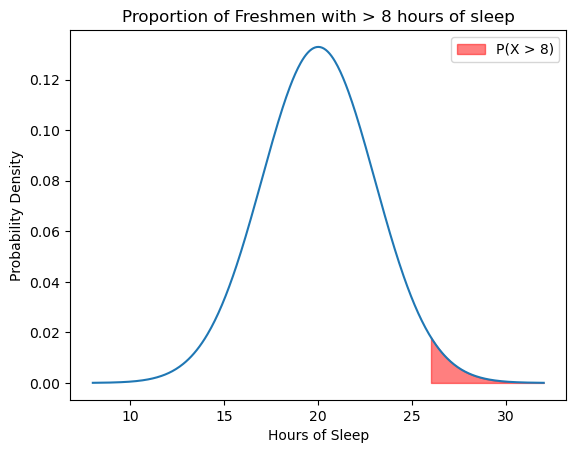

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters
mu = 20  # mean
sigma = 3  # standard deviation
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)    # here 4 is used to gurantee entire population

# Plotting the normal distribution
plt.plot(x, norm.pdf(x, mu, sigma))

# Filling the area for x > 8
x_fill = np.linspace(26, mu + 4*sigma, 500)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='P(X > 8)')

plt.title('Proportion of Freshmen with > 8 hours of sleep')
plt.xlabel('Hours of Sleep')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


### Task 8: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

#  My thinking process 

this section is not for grading purposes, just helps me to analyze the question step by step  

CI= mean ± z(s/√n)

In [32]:
# Code here

std_err = .5 / (np.sqrt(7))

# std_err = stats.sem(5)

ci = stats.t.interval(confidence=.95, loc=5, scale=std_err, df=6)
ci

(4.53757712628571, 5.46242287371429)

### Task 9: Interpret the 95% Confidence Interval that you derived in the above question

In [ ]:
# call_on_students(1)
average amount of sleep that this Freshman gets lies between approximately 4.54 and 5.46 hours.



Interpret: 

- Based on our sample data, we are 95% confident that the average amount of sleep (true population mean) that a freshman at this university gets is between approximately 4.63 and 5.37 hours."




## Part 4: Statistical Testing

Let's make some hypotheses about cars!

### Task 10: Set Up

In [33]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Import the auto-mpg csv from the data folder
df = df = pd.read_csv("data/auto-mpg.csv")  # Replace this with the actual path to your CSV file

In [36]:
# Check the head of our data
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [37]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [39]:
# Describe the data
# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data/auto-mpg.csv")  # Replace this with the actual path to your CSV file

# Check the head of the data to see the first few rows
print("Head of the dataset:")
print(df.head())

# Check the info on the data to understand data types and missing values
print("\nInfo of the dataset:")
print(df.info())

# Use describe to get a statistical summary of the data
print("\nStatistical summary of the dataset:")
print(df.describe())


Head of the dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float

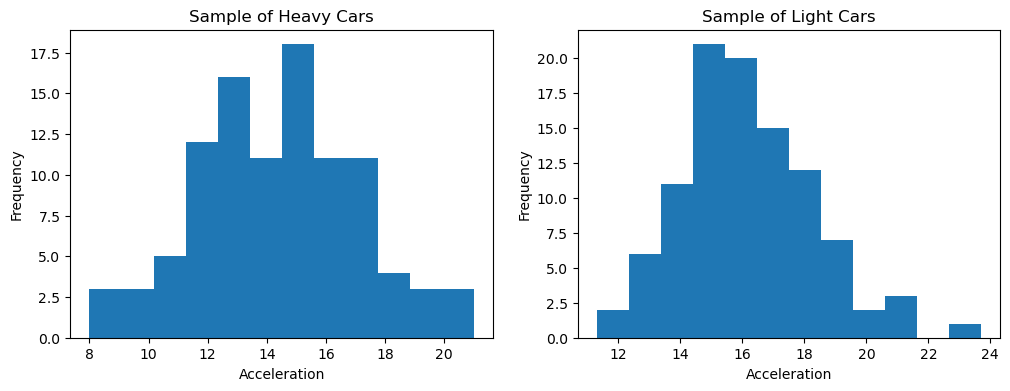

In [40]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 11: Set up the null and alternative hypotheses for this test

#  My thinking process 

this section is not for grading purposes, just helps me to analyze the question step by step 

- Note that this is a one-tailed test because we are specifically interested in finding out if one group (light cars) accelerates faster than the other group (heavy cars).


- The alternative hypothesis should reflect what you are actually trying to prove — in this case, that light cars accelerate faster than heavy cars.

**Null hypothesis:**

-   H0: µ_light <= µ_heavy


**Alternative hypothesis:**

-   H1: µ_light > µ_heavy


### Task 12: Describe your Type 1 and Type 2 errors in this context

**Type I Error:**

- P(Reject Null | Null is True)

- Stating that light cars accelerate faster than heavy cars, when in fact they do not ( the fact is: µ_light <= µ_heavy since H0 is true) 


**Type II Error:**

- P(Do not Reject Null | Null is False)

-  Stating that light cars accelerate slower/or equal than heavy cars, when in fact they do not ( the fact is: µ_light > µ_heavy H1 is true)




### Task 13: The Hypothesis Test!

### 13a: Describe the type of test:

Description:

-  A one-tailed t-test for independent samples will be conducted to test whether light cars accelerate faster than heavy cars. The test will be one-tailed because we are only interested in whether light cars are faster, not just if they are different in either direction.



- Yes, it's a right-tailed (or one-tailed on the right side) test. In a right-tailed test, you're interested in finding out if one mean is greater than another, not merely different.


### 13b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [42]:
np.array(heavy_cars.acceleration).var()  

7.203299

In [43]:
np.array(light_cars.acceleration).var()

4.9233839999999995

# Comments for below code : 

equal_var=True (which is the default), the function assumes that the populations the samples come from have equal variances.

In [47]:
# Code here
tstat, p = stats.ttest_ind(heavy_cars.acceleration, light_cars.acceleration) # this is default two-tailed etst 


In [45]:
tstat, p/2

(-5.00874014469676, 6.048220334084493e-07)

# my interpretation of above values 

- The t-statistic (tstat = -5.00874014469676) is calculated as the difference between the sample means, divided by the standard error of the difference between the two sample means. A negative t-statistic here suggests that the first sample (heavy_cars) has a smaller mean than the second (light_cars).       


- The two-tailed p-value (p = 1.2412905689208302e-06 when not divided by 2) indicates the probability of observing a t-statistic as extreme as the one calculated, assuming the null hypothesis is true. Because it's a two-tailed test by default, the p-value gives us the probability of observing a t-statistic this extreme in either tail of the distribution.

In [46]:
stats.ttest_ind(heavy_cars.acceleration, light_cars.acceleration, equal_var=False)

Ttest_indResult(statistic=-5.00874014469676, pvalue=1.2412905689208302e-06)

### 13c: Analyze your results: can you reject the null hypothesis?

In [ ]:
# call_on_students(1)

Can you reject the null hypothesis?

-  Yes because p-value= 6.048220334084493e-07 < alpha= 0.05

-  Conclusion:   µ_light > µ_heavy


In [52]:
# Make a decision based on the p-value
if p < 0.05: 
    print("Reject the null hypothesis")
else:
    print("Do not reject the null hypothesis")


Reject the null hypothesis
